# 游눹 Aggregering av data

Dataaggregering refererer til en prosess der vi kombinerer data i grupper. N친r
vi gj칮r romlig dataaggregering, sl친r vi geometriene sammen til grovere
enheter (basert p친 noen attributter), og kan ogs친 beregne sammendragsstatistikk for
disse kombinerte geometriene fra de opprinnelige, mer detaljerte verdiene. For eksempel,
anta at vi er interessert i 친 studere kontinenter, men vi har bare
landniv친data som datsettet for land; Hvis vi aggregerer dataene etter
kontinent, vil vi konvertere dataene p친 landsniv친 til et datasett p친
kontinentniv친.


I denne oppl칝ringen vil vi aggregere befolkningsdataene v친re i 칀s, dvs. rutenettcellene som har samme antall innbyggere vil bli sl친tt sammen.

La oss starte med 친 laste inn befolkningsdata i 칀s fra filen: `aas_befolkning_2023.geojson`:

In [5]:
import pathlib 
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_MAPPE = NOTEBOOK_PATH / "data"

In [6]:
import geopandas
intersection = geopandas.read_file(DATA_MAPPE / "ssb_rutenett" / "aas_befolkning_2023.geojson")

For 친 gj칮re aggregeringen vil vi bruke en metode som heter `dissolve()` som tar
som inngang kolonnen som vil bli brukt til 친 utf칮re aggregeringen:

In [7]:
# Utf칮re aggregeringen
dissolved = intersection.dissolve(by="pop_tot")

# Hva fikk vi
dissolved.head()

geometry          ru250m  \
pop_tot                                                                      
1        MULTIPOLYGON (((261225.860 6618040.140, 261183...  22605006626000   
2        MULTIPOLYGON (((260250.000 6618500.000, 260250...  22650006625250   
3        MULTIPOLYGON (((260000.000 6619250.000, 260250...  22617506625250   
4        MULTIPOLYGON (((262000.000 6618000.000, 262000...  22602506625750   
5        MULTIPOLYGON (((261079.690 6617980.860, 261078...  22650006625500   

             gml_id                               lokalId  \
pop_tot                                                     
1        kommune.28  d285e9c4-8da0-4dfc-b927-31ba7ee17e6a   
2        kommune.28  d285e9c4-8da0-4dfc-b927-31ba7ee17e6a   
3        kommune.28  d285e9c4-8da0-4dfc-b927-31ba7ee17e6a   
4        kommune.28  d285e9c4-8da0-4dfc-b927-31ba7ee17e6a   
5        kommune.28  d285e9c4-8da0-4dfc-b927-31ba7ee17e6a   

                                                  navnerom  versjonId  \
pop_tot                                                                 
1        https://data.geonorge.no/sosi/inndelinger/innd...          3   
2        https://data.geonorge.no/sosi/inndelinger/innd...          3   
3        https://data.geonorge.no/sosi/inndelinger/innd...          3   
4        https://data.geonorge.no/sosi/inndelinger/innd...          3   
5        https://data.geonorge.no/sosi/inndelinger/innd...          3   

           oppdateringsdato   gyldigFra      datauttaksdato navn spr친k  \
pop_tot                                                                  
1       2023-11-28 16:00:22  2024-01-01 2024-03-04 12:27:57   칀s   nor   
2       2023-11-28 16:00:22  2024-01-01 2024-03-04 12:27:57   칀s   nor   
3       2023-11-28 16:00:22  2024-01-01 2024-03-04 12:27:57   칀s   nor   
4       2023-11-28 16:00:22  2024-01-01 2024-03-04 12:27:57   칀s   nor   
5       2023-11-28 16:00:22  2024-01-01 2024-03-04 12:27:57   칀s   nor   

         kommunenummer kommunenavn  samiskForvaltningsomr친de  
pop_tot                                                       
1                 3218          칀s                     False  
2                 3218          칀s                     False  
3                 3218          칀s                     False  
4                 3218          칀s                     False  
5                 3218          칀s                     False

La oss sammenligne antall celler i lagene f칮r og etter aggregeringen:

In [8]:
print(f"Rader i opprinnelig intersection GeoDataFrame: {len(intersection)}")
print(f"Rader i oppl칮st lag: {len(dissolved)}")

Rader i opprinnelig intersection GeoDataFrame: 636
Rader i oppl칮st lag: 142


Faktisk har antall rader i dataene v친re blitt redusert og polygonene har blitt
sl친tt sammen.

Hva skjedde egentlig her? La oss ta en n칝rmere titt. 

La oss se hvilke kolonner vi n친 har i v친r GeoDataFrame:

In [9]:
dissolved.columns

Index(['geometry', 'ru250m', 'gml_id', 'lokalId', 'navnerom', 'versjonId',
       'oppdateringsdato', 'gyldigFra', 'datauttaksdato', 'navn', 'spr친k',
       'kommunenummer', 'kommunenavn', 'samiskForvaltningsomr친de'],
      dtype='object')

Som vi kan se, kan ikke kolonnen som vi brukte for 친 utf칮re aggregeringen
(`pop_tot`) finnes lenger i kolonnelisten. Hva skjedde med
den?

La oss ta en titt p친 indeksene i v친r GeoDataFrame:

In [10]:
dissolved.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       250, 256, 261, 278, 284, 297, 300, 344, 368, 379],
      dtype='int64', name='pop_tot', length=142)

Aha! Vel n친 forst친r vi hvor kolonnen v친r gikk. Den brukes n친 som indeks i
v친r `dissolved` GeoDataFrame. 

N친 kan vi for eksempel bare velge slike geometrier fra laget som har for
eksempel n칮yaktig 15 innbyggere:

In [11]:
# Velg bare geometrier som har 15 innbyggere
dissolved.loc[15]

geometry                    MULTIPOLYGON (((259250.00000892268 6620999.999...
ru250m                                                         22612506625750
gml_id                                                             kommune.28
lokalId                                  d285e9c4-8da0-4dfc-b927-31ba7ee17e6a
navnerom                    https://data.geonorge.no/sosi/inndelinger/innd...
versjonId                                                                   3
oppdateringsdato                                          2023-11-28 16:00:22
gyldigFra                                                          2024-01-01
datauttaksdato                                            2024-03-04 12:27:57
navn                                                                       칀s
spr친k                                                                     nor
kommunenummer                                                            3218
kommunenavn                                                     

In [12]:
# Se datatype
type(dissolved.loc[15])

pandas.core.series.Series

Som vi kan se, har vi n친 som et resultat et Pandas `Series` objekt som inneholder
i utgangspunktet en rad fra v친r opprinnelige aggregerte GeoDataFrame.

La oss ogs친 visualisere disse 15 innbyggere-rutenettcellene.

F칮rst m친 vi konvertere den valgte raden tilbake til en GeoDataFrame:

In [13]:
# Lag en GeoDataFrame
selection = geopandas.GeoDataFrame([dissolved.loc[15]], crs=dissolved.crs)

Plott utvalget p친 toppen av hele rutenettet:

<Axes: >

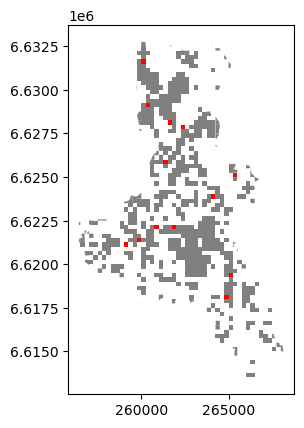

In [14]:
# Plott alle rutenettcellene, og rutenettcellene som har 15 innbyggere
ax = dissolved.plot(facecolor="gray")
selection.plot(ax=ax, facecolor="red")

En annen m친te 친 visualisere befolkningen i hele GeoDataFrame p친 er 친 plott ved hjelp av en spesifikk kolonne. For 친 bruke v친r `pop_tot` kolonne, som n친 er indeksen i GeoDataFrame, m친 vi tilbakestille indeksen:

In [15]:
dissolved = dissolved.reset_index()
dissolved.head()

pop_tot                                           geometry          ru250m  \
0        1  MULTIPOLYGON (((261225.860 6618040.140, 261183...  22605006626000   
1        2  MULTIPOLYGON (((260250.000 6618500.000, 260250...  22650006625250   
2        3  MULTIPOLYGON (((260000.000 6619250.000, 260250...  22617506625250   
3        4  MULTIPOLYGON (((262000.000 6618000.000, 262000...  22602506625750   
4        5  MULTIPOLYGON (((261079.690 6617980.860, 261078...  22650006625500   

       gml_id                               lokalId  \
0  kommune.28  d285e9c4-8da0-4dfc-b927-31ba7ee17e6a   
1  kommune.28  d285e9c4-8da0-4dfc-b927-31ba7ee17e6a   
2  kommune.28  d285e9c4-8da0-4dfc-b927-31ba7ee17e6a   
3  kommune.28  d285e9c4-8da0-4dfc-b927-31ba7ee17e6a   
4  kommune.28  d285e9c4-8da0-4dfc-b927-31ba7ee17e6a   

                                            navnerom  versjonId  \
0  https://data.geonorge.no/sosi/inndelinger/innd...          3   
1  https://data.geonorge.no/sosi/inndelinger/innd...          3   
2  https://data.geonorge.no/sosi/inndelinger/innd...          3   
3  https://data.geonorge.no/sosi/inndelinger/innd...          3   
4  https://data.geonorge.no/sosi/inndelinger/innd...          3   

     oppdateringsdato   gyldigFra      datauttaksdato navn spr친k  \
0 2023-11-28 16:00:22  2024-01-01 2024-03-04 12:27:57   칀s   nor   
1 2023-11-28 16:00:22  2024-01-01 2024-03-04 12:27:57   칀s   nor   
2 2023-11-28 16:00:22  2024-01-01 2024-03-04 12:27:57   칀s   nor   
3 2023-11-28 16:00:22  2024-01-01 2024-03-04 12:27:57   칀s   nor   
4 2023-11-28 16:00:22  2024-01-01 2024-03-04 12:27:57   칀s   nor   

   kommunenummer kommunenavn  samiskForvaltningsomr친de  
0           3218          칀s                     False  
1           3218          칀s                     False  
2           3218          칀s                     False  
3           3218          칀s                     False  
4           3218          칀s                     False

Som vi kan se, har vi n친 v친r `pop_tot` som en kolonne igjen, og kan da plott GeoDataFrame ved 친 sende denne kolonnen ved hjelp av `column` parameteren:

<Axes: >

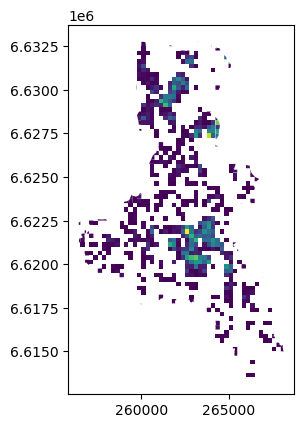

In [16]:
dissolved.plot(column="pop_tot")